In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes_prediction_data_large.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,69,107,30,606,52.2,0.935,59,1
1,15,168,82,59,810,20.6,0.317,30,1
2,0,164,82,14,766,58.8,1.923,45,1
3,3,58,57,48,512,2.9,1.736,50,1
4,3,177,22,56,733,0.0,2.237,26,0
...,...,...,...,...,...,...,...,...,...
495,5,80,86,41,17,60.9,1.524,28,0
496,4,64,53,60,607,27.4,2.220,44,0
497,17,129,10,47,560,22.3,1.983,70,1
498,5,50,43,15,805,66.4,1.246,61,1


In [5]:
data.shape

(500, 9)

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,8.040000,99.082000,62.106000,50.982000,412.344000,33.037600,1.287400,51.538000,0.478000
std,5.143473,56.031405,35.532857,28.788805,248.083083,19.557363,0.674056,17.441473,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,3.000000,51.750000,29.000000,26.000000,201.000000,15.500000,0.732000,37.000000,0.000000
50%,8.000000,101.000000,61.500000,50.000000,409.000000,32.700000,1.293000,53.000000,0.000000
75%,13.000000,146.000000,95.000000,76.000000,626.250000,50.650000,1.887500,66.000000,1.000000
max,17.000000,200.000000,122.000000,99.000000,846.000000,67.000000,2.411000,81.000000,1.000000


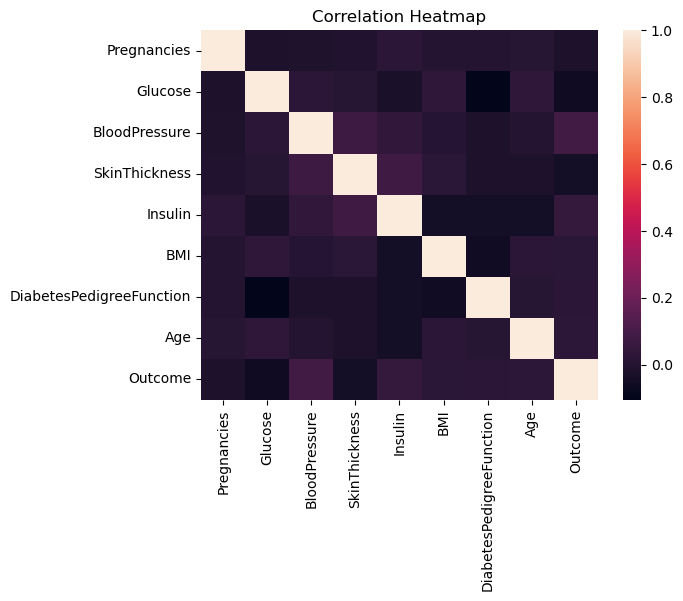

In [11]:
sns.heatmap(data.corr())
plt.title("Correlation Heatmap")
plt.show()

In [25]:
X = data.drop("Outcome", axis=1)
Y = data["Outcome"]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,12,69,107,30,606,52.2,0.935,59
1,15,168,82,59,810,20.6,0.317,30
2,0,164,82,14,766,58.8,1.923,45
3,3,58,57,48,512,2.9,1.736,50
4,3,177,22,56,733,0.0,2.237,26
...,...,...,...,...,...,...,...,...
495,5,80,86,41,17,60.9,1.524,28
496,4,64,53,60,607,27.4,2.220,44
497,17,129,10,47,560,22.3,1.983,70
498,5,50,43,15,805,66.4,1.246,61


In [29]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    1
498    1
499    1
Name: Outcome, Length: 500, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [34]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
471,3,172,42,83,91,15.5,0.420,22
26,14,153,44,56,483,31.6,0.156,62
7,4,161,28,69,797,42.8,1.774,46
453,2,28,58,94,7,57.1,1.761,38
108,11,185,29,15,262,55.4,0.726,43
...,...,...,...,...,...,...,...,...
106,4,134,103,4,466,6.3,0.385,65
270,15,148,70,37,201,48.2,1.311,75
348,3,177,119,13,432,48.4,0.309,62
435,9,191,106,48,220,56.4,1.251,45


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,Y_train)
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))

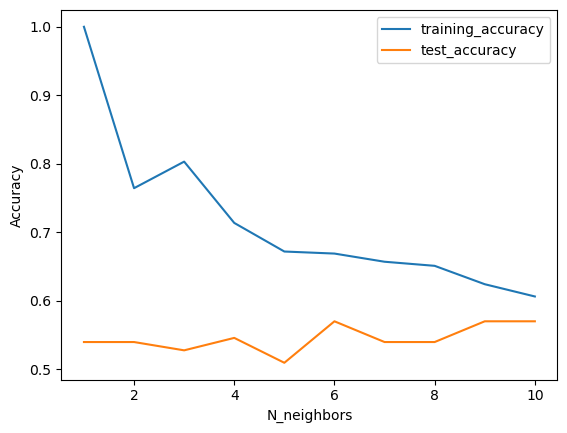

In [40]:
plt.plot(range(1,11),training_accuracy, label = "training_accuracy")
plt.plot(range(1,11),test_accuracy, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N_neighbors")
plt.legend()

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
print(knn.score(X_train,Y_train),": Training accuracy")
print(knn.score(X_test,Y_test),": Test accuracy")

0.8029850746268656 : Training accuracy
0.5272727272727272 : Test accuracy


In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train),": Training accuracy")
print(dt.score(X_test,Y_test),": Test accuracy")

1.0 : Training accuracy
0.42424242424242425 : Test accuracy


In [106]:
dt = DecisionTreeClassifier(random_state=0,max_depth=2)
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train),": Training accuracy")
print(dt.score(X_test,Y_test),": Test accuracy")

0.5761194029850746 : Training accuracy
0.4909090909090909 : Test accuracy


In [120]:
from sklearn.neural_network import MLPClassifier
mlp = DecisionTreeClassifier(random_state=42)
mlp.fit(X_train,Y_train)
print(mlp.score(X_train,Y_train),": Training accuracy")
print(mlp.score(X_test,Y_test),": Test accuracy")

1.0 : Training accuracy
0.4484848484848485 : Test accuracy


In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [126]:
mlp.fit(X_train_scaled,Y_train)
print(mlp.score(X_train_scaled,Y_train),": Training accuracy")
print(mlp.score(X_test_scaled,Y_test),": Test accuracy")

1.0 : Training accuracy
0.5393939393939394 : Test accuracy
